In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [3]:
df = pd.read_pickle("../data/reviews_vector_ngrams.pkl")

In [4]:
minority_count = df[df['binary'] == 0].shape[0]
# random sample of majority class
majority_sample = df[df['binary'] == 1].sample(n=minority_count, random_state=42)

# merge to make balanced dataset
balanced_df = pd.concat([df[df['binary'] == 0], majority_sample])

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [5]:
y_prime = balanced_df["binary"]
X=df[df.columns[4:]]
y=df["binary"]
X_prime = balanced_df[balanced_df.columns[4:]]


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [7]:
X_train_prime, X_test_prime, y_train_prime, y_test_prime = train_test_split(X_prime, y_prime, test_size=0.2, stratify=y_prime, random_state=42)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [9]:
scaler_prime = StandardScaler()
scaler_prime.fit(X_train_prime)
X_train_transformed_prime = scaler.transform(X_train_prime)
X_test_transformed_prime = scaler.transform(X_test_prime)

In [11]:

random_forest_model = RandomForestClassifier(n_estimators=20) # setting max features is not needed here as our dataset only has 2 features.
random_forest_model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_estimators=20)

In [23]:

random_forest_model_prime = RandomForestClassifier(n_estimators=20) # setting max features is not needed here as our dataset only has 2 features.
random_forest_model_prime.fit(X_train_transformed_prime, y_train_prime)

RandomForestClassifier(n_estimators=20)

In [24]:
# unbalanced classes - good accuracy - but what about other metrics?
random_forest_model.score(X_train_transformed, y_train), random_forest_model.score(X_test_transformed, y_test)

(0.9768149307578384, 0.8701267343856162)

In [25]:
# downsampled majority class - great accuracy - but what about other metrics?
random_forest_model_prime.score(X_train_transformed_prime, y_train_prime), random_forest_model.score(X_test_transformed_prime, y_test_prime)

(0.9599731987434386, 0.9153412075258246)

In [15]:
y_test_pred = random_forest_model.predict(X_test_transformed) 

In [26]:
y_test_pred_prime = random_forest_model_prime.predict(X_test_transformed_prime) 

In [19]:
cm = confusion_matrix(y_test, y_test_pred)
cm_norm = confusion_matrix(y_test, y_test_pred, normalize="true")

In [27]:
cm_prime = confusion_matrix(y_test_prime, y_test_pred_prime)
cm_norm_prime = confusion_matrix(y_test_prime, y_test_pred_prime, normalize="true")

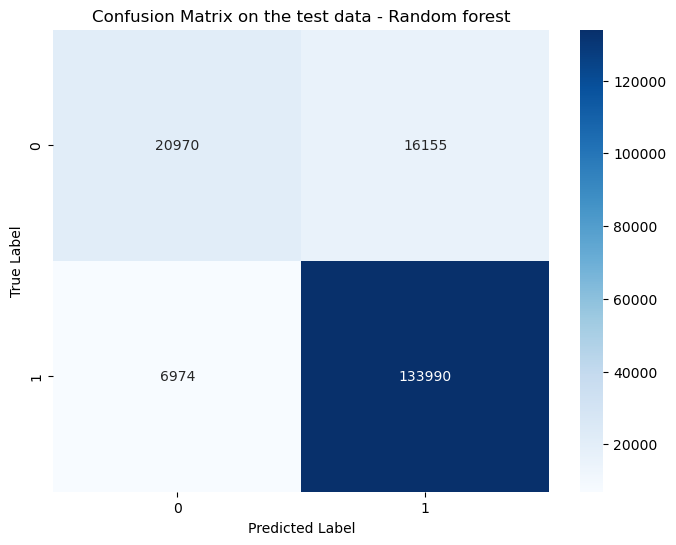

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - Random forest")
plt.show()

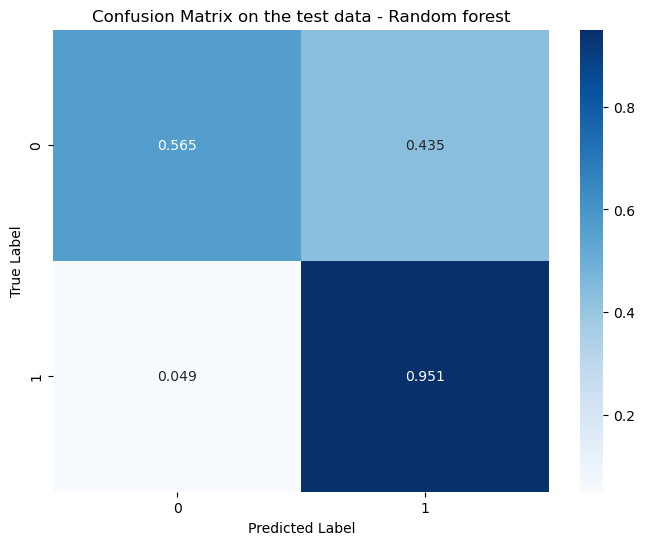

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt=".3f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - Random forest")
plt.show()

In [22]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64     37125
           1       0.89      0.95      0.92    140964

    accuracy                           0.87    178089
   macro avg       0.82      0.76      0.78    178089
weighted avg       0.86      0.87      0.86    178089



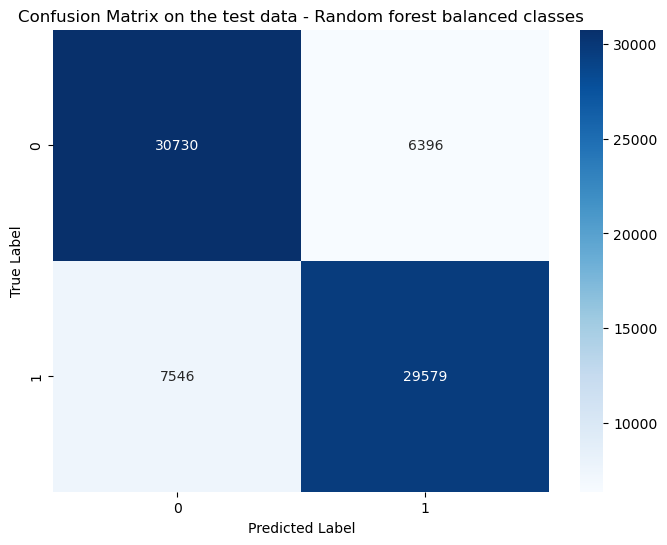

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_prime, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - Random forest balanced classes")
plt.show()

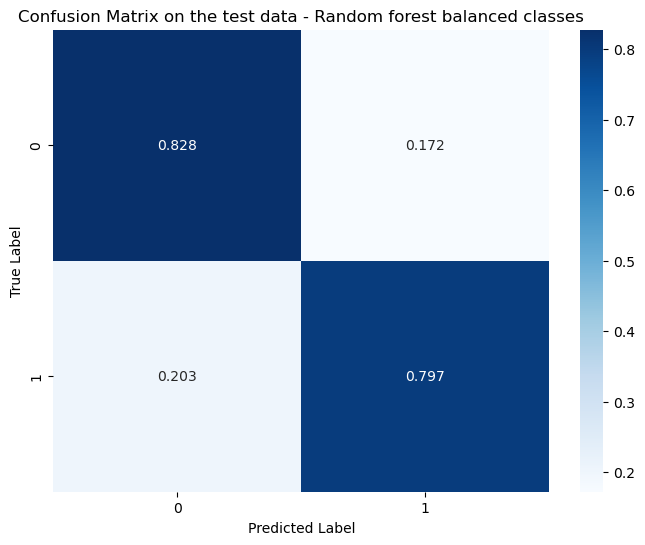

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm_prime, annot=True, fmt=".3f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - Random forest balanced classes")
plt.show()

In [35]:
print(classification_report(y_test_prime, y_test_pred_prime))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82     37126
           1       0.82      0.80      0.81     37125

    accuracy                           0.81     74251
   macro avg       0.81      0.81      0.81     74251
weighted avg       0.81      0.81      0.81     74251



In [37]:


# fitting AdaBoost model with 20 estimators
abc_2 = AdaBoostClassifier(n_estimators=20)
abc_2.fit(X_train_transformed, y_train)

# evaluate
y_pred_ada = abc_2.predict(X_test_transformed)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.70      0.28      0.41     37125
           1       0.84      0.97      0.90    140964

    accuracy                           0.83    178089
   macro avg       0.77      0.63      0.65    178089
weighted avg       0.81      0.83      0.80    178089

